In [15]:
import os
import pandas as pd
# df_paths=[os.path.join('Benchmark',file) for file in os.listdir('Benchmark')]

# print('')

root_folder='Benchmark'
dataframe = None

# Load and concatenate dataframes from pickles in the root folder
for file in os.listdir(root_folder):
    df_loaded = pd.read_pickle(os.path.join(root_folder, file))
    if dataframe is not None:
        dataframe = pd.concat([dataframe, df_loaded], ignore_index=True)
    else:
        dataframe = df_loaded

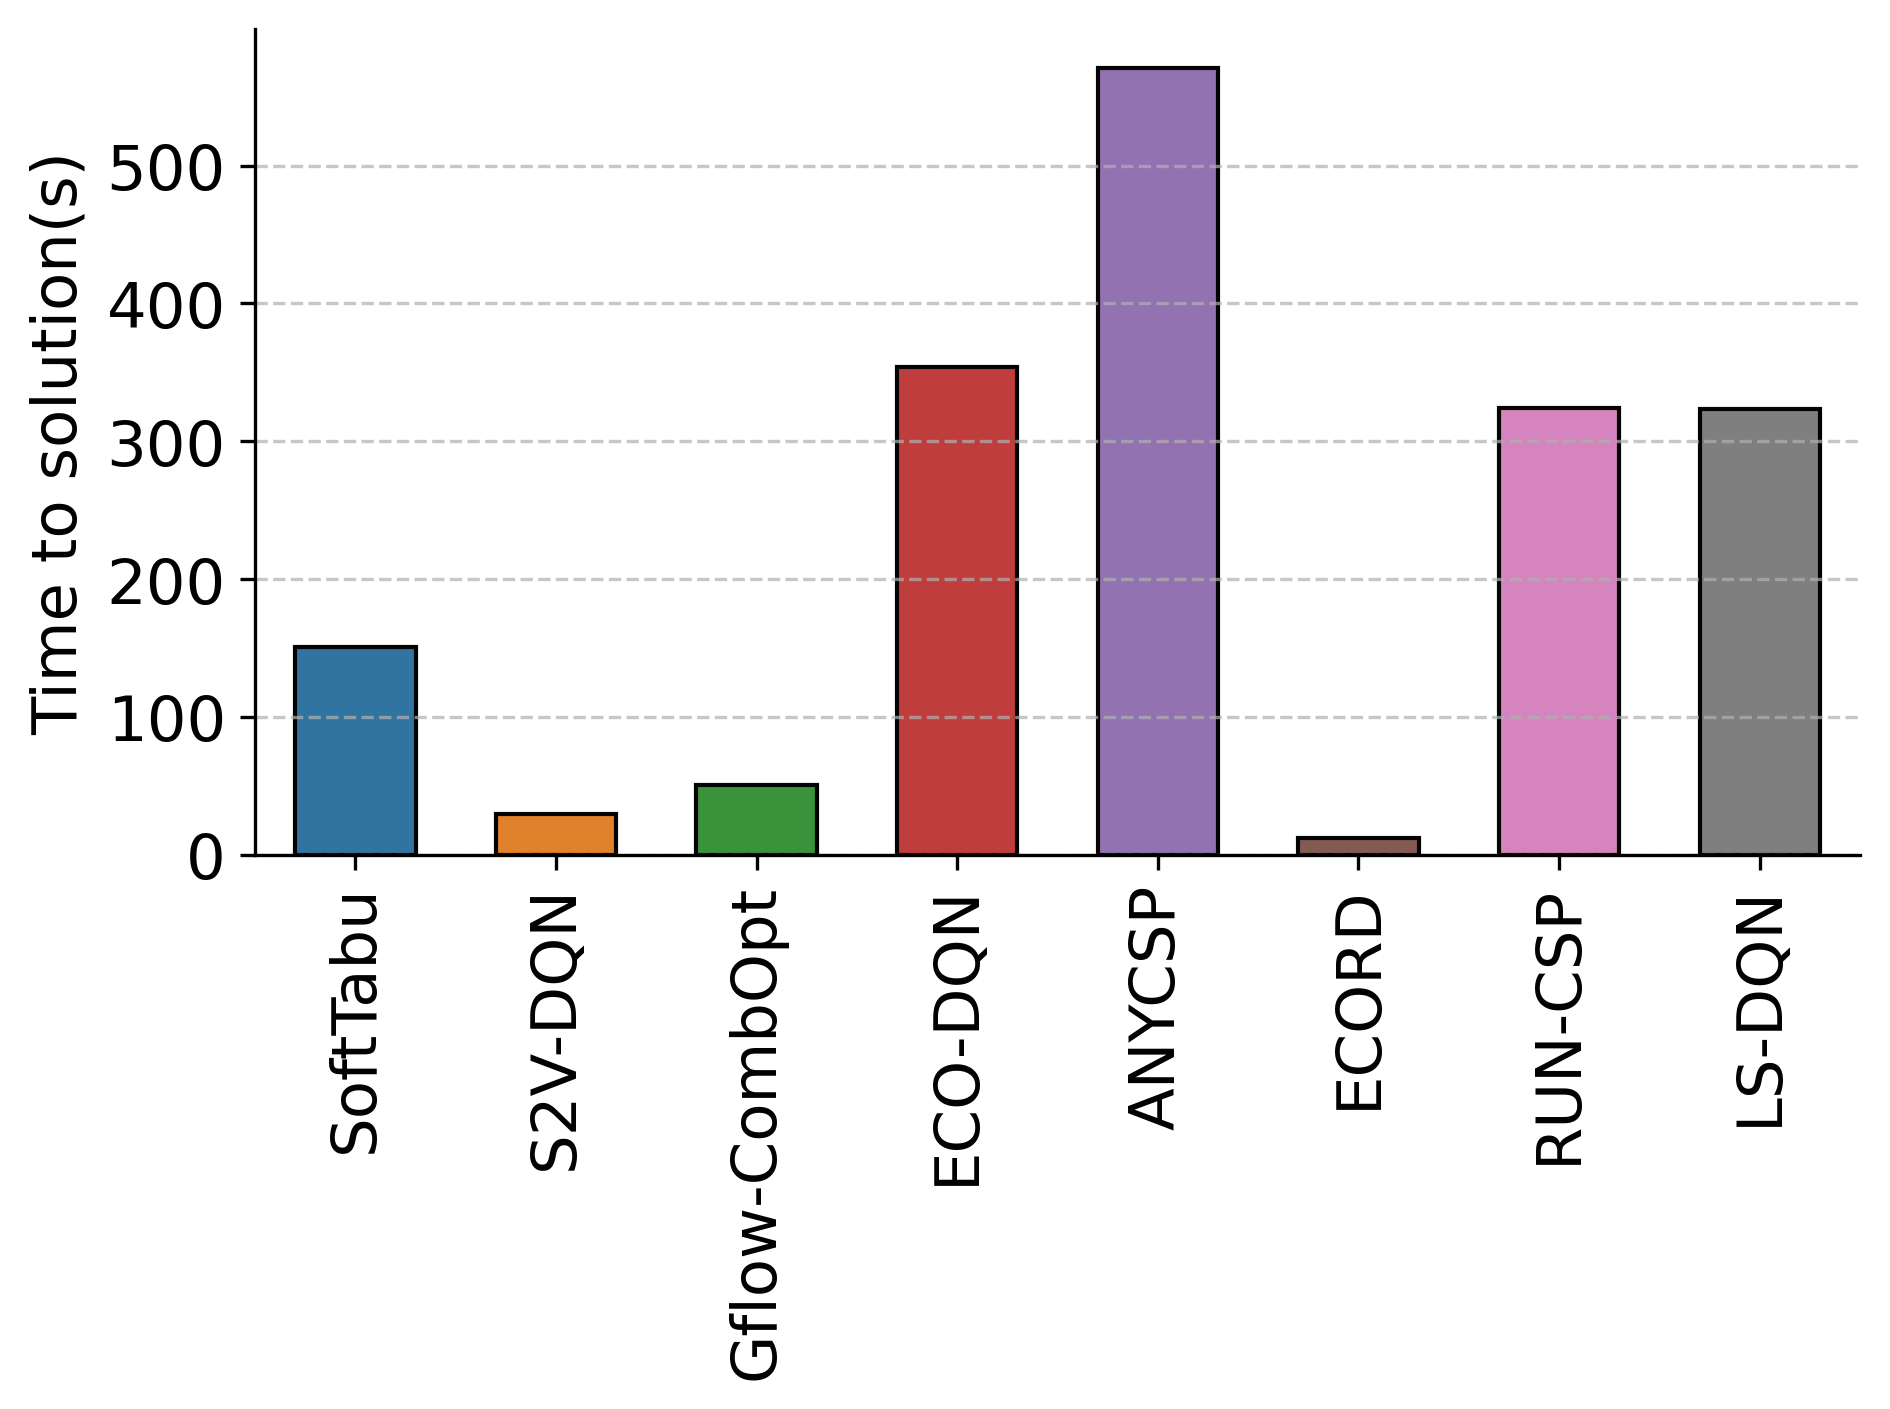

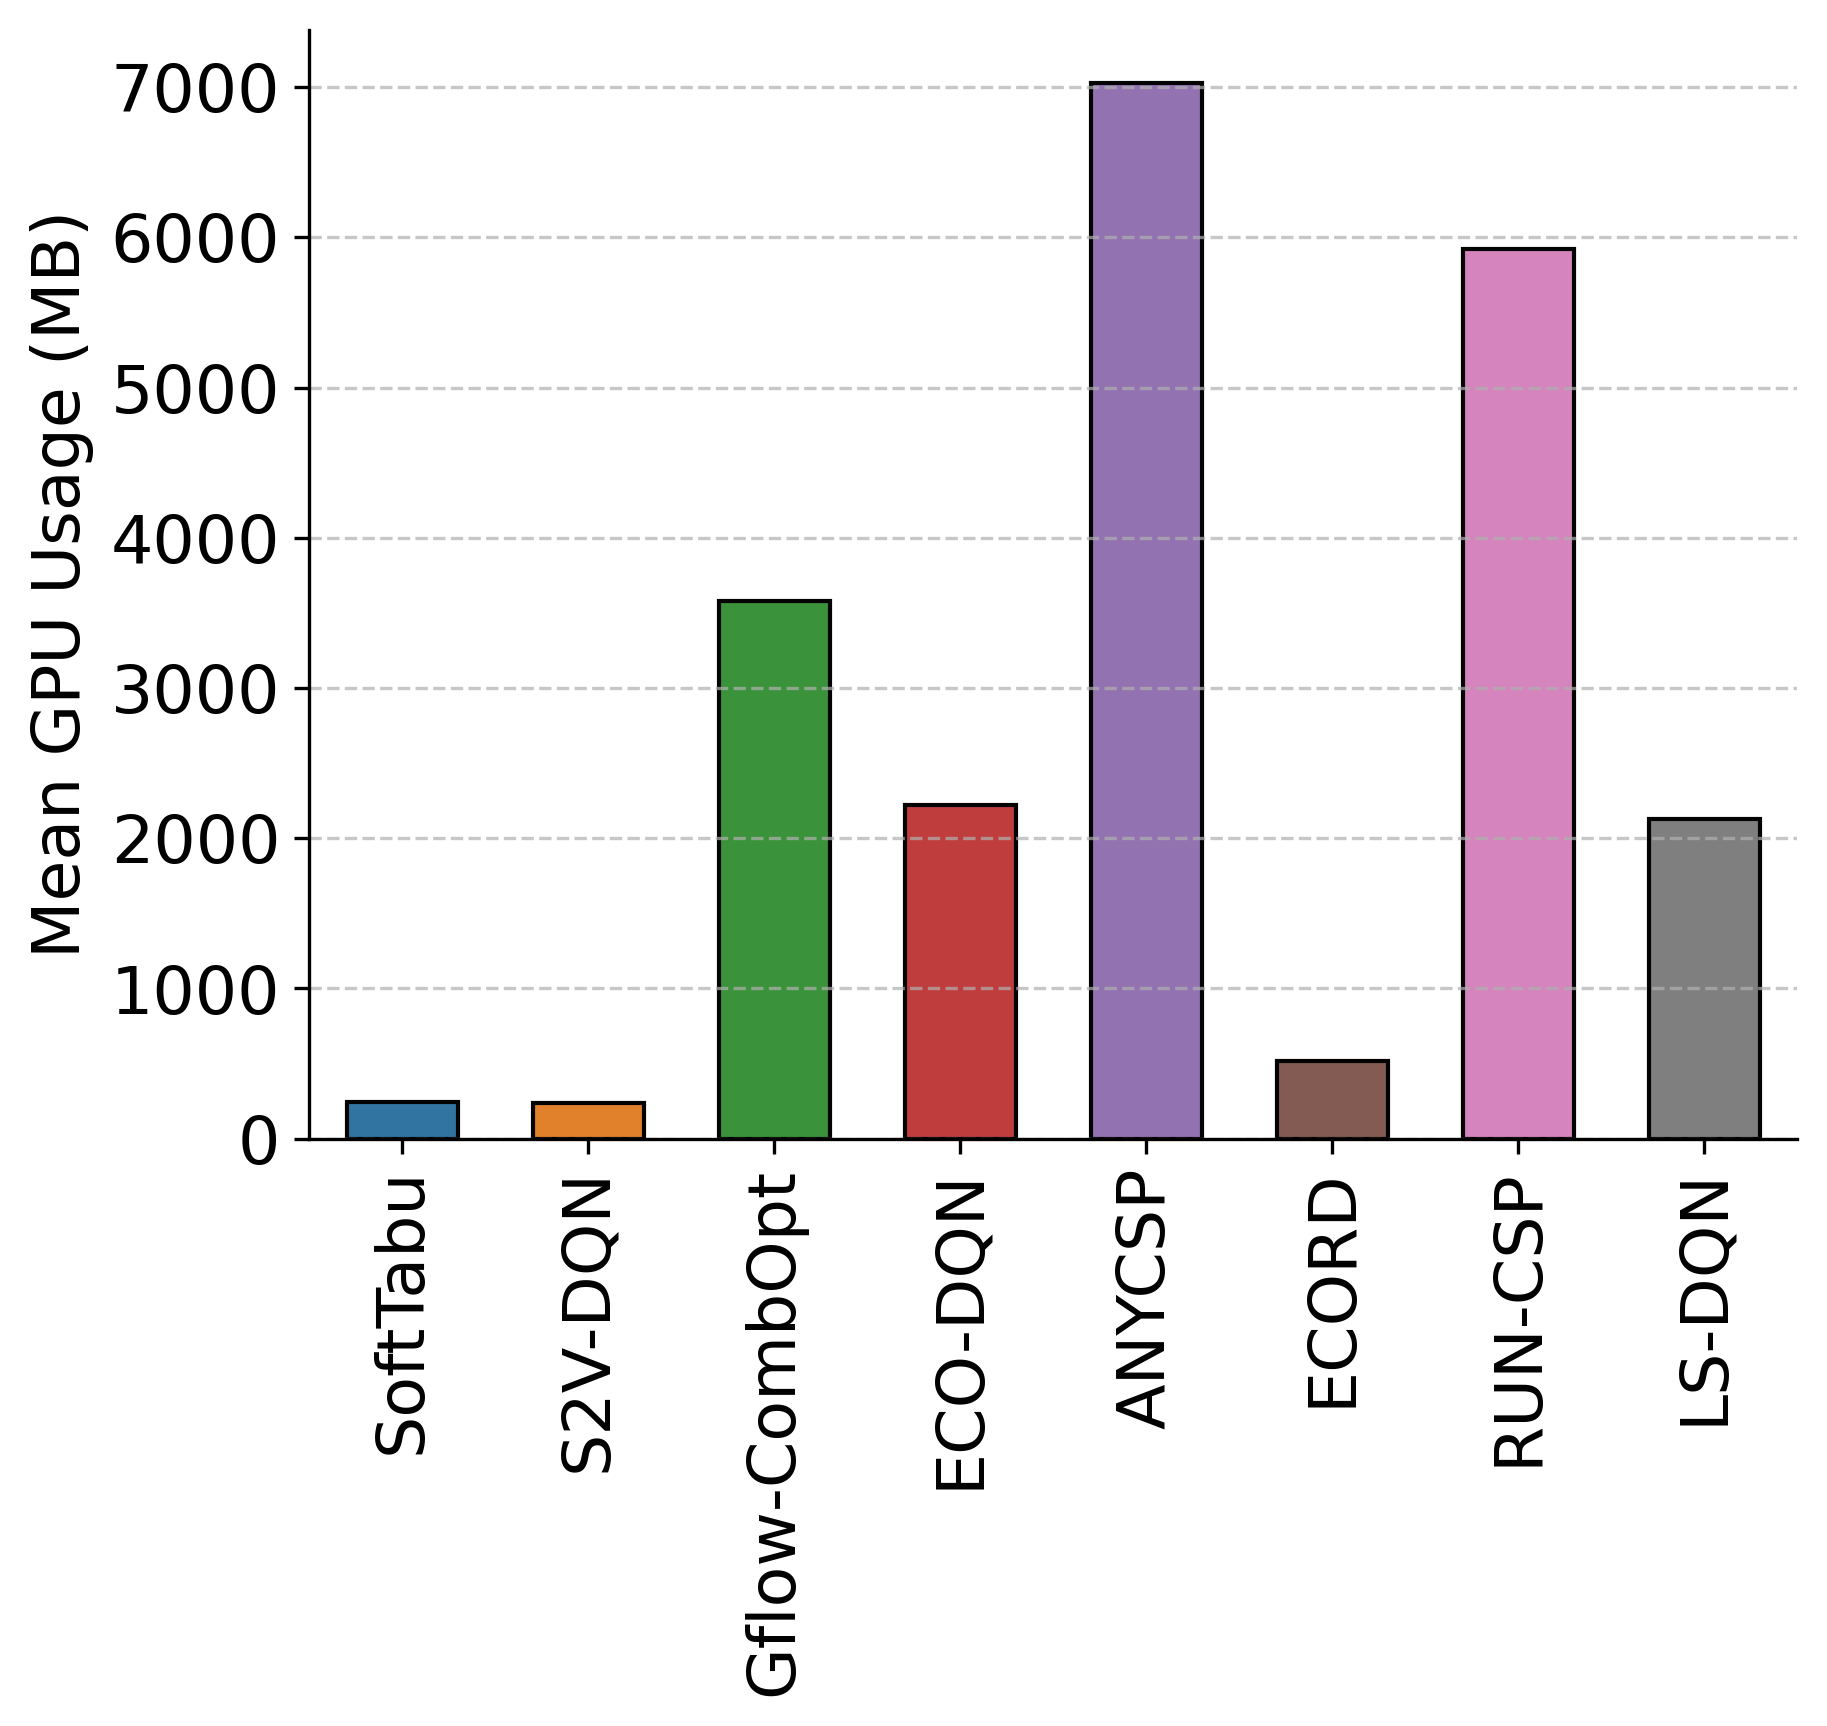

In [61]:
# dataframe[dataframe['Algorthim']=='ECORD'].loc['Mean GPU Usage']=516

dataframe.loc[dataframe['Algorthim'] == 'ECORD', 'Mean GPU Usage'] = 516
dataframe.loc[dataframe['Algorthim'] == 'Gflow-CombOpt', 'Mean GPU Usage'] = 3582
dataframe.loc[dataframe['Algorthim'] == 'S2V', 'Mean GPU Usage'] = 238


dataframe.loc[dataframe['Algorthim'] == 'LinearRegression', 'Algorthim'] = 'SoftTabu'
dataframe.loc[dataframe['Algorthim'] == 'ECO_DQN', 'Algorthim'] = 'ECO-DQN'
dataframe.loc[dataframe['Algorthim'] == 'LSDQN', 'Algorthim'] = 'LS-DQN'
dataframe.loc[dataframe['Algorthim'] == 'S2V', 'Algorthim'] = 'S2V-DQN'
dataframe.loc[dataframe['Algorthim'] == 'RUNCSP', 'Algorthim'] = 'RUN-CSP'

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
fig_width = 8
fig_height =4
dpi=300
# plt.figure(dpi=300,figsize=(fig_width,fig_height))
plt.figure(dpi=300)
fontsize=15
# Suppress Matplotlib user warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Create the bar plot
sns.barplot(data=dataframe, x="Algorthim", y="Elapsed Time (s)", width=0.6, linewidth=1, edgecolor=".01")
sns.despine( top=True, right=True)

# Rotate the x-axis tick labels
plt.xticks(rotation=90, fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('')
plt.ylabel('Time to solution(s)',fontsize=fontsize)
plt.grid(True, linestyle='--',axis='y', alpha=0.7)
# plt.locator_params(nbins=4)
plt.tight_layout()
plt.savefig(f'time.pdf',format='pdf', dpi=dpi,bbox_inches='tight')

# Display the plot
plt.show()

# plt.figure(dpi=300,figsize=(fig_width,fig_height))
plt.figure(dpi=300)
fontsize=16
# Suppress Matplotlib user warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Create the bar plot
sns.barplot(data=dataframe, x="Algorthim", y="Mean GPU Usage", width=0.6, linewidth=1, edgecolor=".01")
sns.despine( top=True, right=True)
# Rotate the x-axis tick labels
plt.xticks(rotation=90, fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('')
plt.ylabel('Mean GPU Usage (MB)',fontsize=fontsize)
# plt.locator_params(nbins=4)
plt.grid(True, linestyle='--',axis='y', alpha=0.7)
plt.savefig(f'gpu.pdf',format='pdf', dpi=dpi,bbox_inches='tight')
# Display the plot
plt.show()
